In [1]:
import ROOT
import ctypes

Welcome to JupyROOT 6.26/04


In [2]:
ROOT.gROOT.LoadMacro('/home/jykim/workspace/DRAW_and_FITTING/main/Belle2Style.C')
ROOT.SetBelle2Style()


Applying BELLE2 style settings...


In [61]:
# sig_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_sig_ext_signalMC_recon_mdst_phi.root")
# signal_tree = sig_file.Get("antiKstar")


sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_1ab_sigbkg/topo/resultfile/result_antiKstar/standard.root")
signal_1ab_tree = sig_1ab_file.Get("antiKstar")


In [4]:
# D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.67,2.06)
D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.72,1.92)
D0_M_TH1F_2 = ROOT.TH1F("D0_M_TH1F_2","D0 mass",50,1.72,1.92)

D0_cosHel_TH1F = ROOT.TH1F("D0_cosHel_TH1F","D0_cosHel",50, -1, 1)


In [5]:
def extract_histo(tree, histogram):
    for event in tree:
        histogram.Fill(event.D0_M)
    return histogram

In [6]:
def extract_hist_coshel(tree, histogram):
    for event in tree:
        if event.nSigCascDcyBr_1==1 and event.D0_M > 1.67 and event.D0_M < 2.06 and event.Belle2Pi0Veto_75MeV > 0.022:

            histogram.Fill(event.D0_cosHel_0)
    return histogram

In [7]:
def apply_cuts(tree, histogram):
    for event in tree:
        # if event.D0_M > 1.67 and event.D0_M < 2.06:
        if event.D0_M > 1.78 and event.D0_M < 1.92 and event.Belle2Pi0Veto_75MeV > 0.022:

            histogram.Fill(event.D0_M)
    return histogram

In [8]:
def extract_signals(tree, histogram):
    for event in tree:
        # if event.D0_M > 1.67 and event.D0_M < 2.06:
        if event.nSigCascDcyBr_1==1 and event.D0_M > 1.72 and event.D0_M < 1.92 and event.Belle2Pi0Veto_75MeV > 0.022:
        # if event.nSigCascDcyBr_0==1 and event.D0_M > 1.67 and event.D0_M < 2.06 and event.Belle2Pi0Veto_75MeV > 0.02:

            histogram.Fill(event.D0_M)
    return histogram

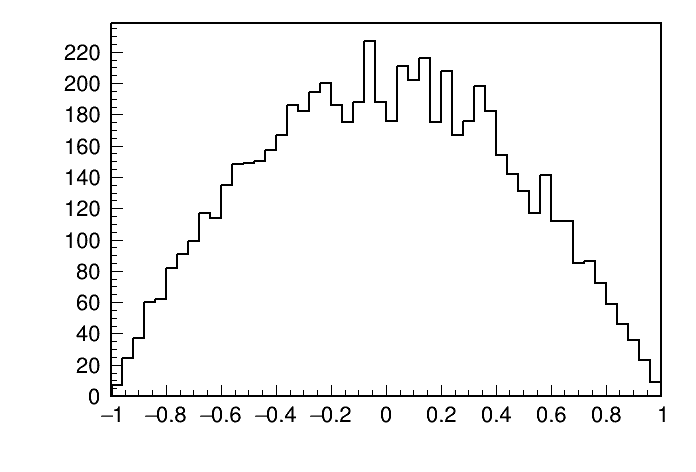

In [9]:
D0_cosHel_TH1F = extract_hist_coshel(signal_1ab_tree, D0_cosHel_TH1F)
c1 = ROOT.TCanvas()
D0_cosHel_TH1F.Draw()
c1.Draw()

In [10]:

# D0_M_TH1F = apply_cuts(signal_tree, D0_M_TH1F)
# c1 = ROOT.TCanvas()
# D0_M_TH1F.Draw()
# c1.Draw()

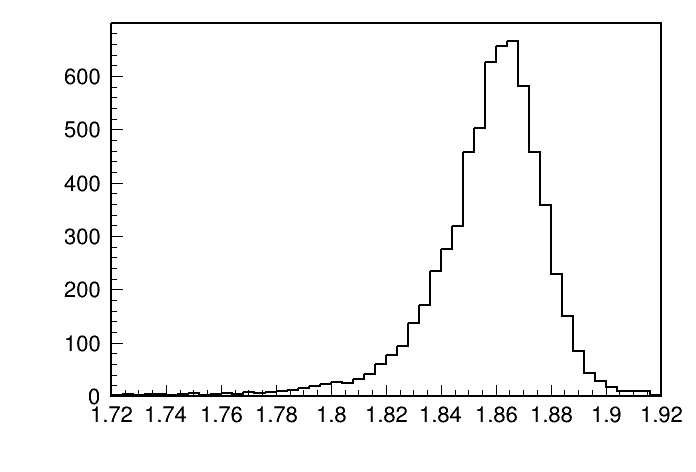

In [11]:

D0_M_TH1F_2 = extract_signals(signal_1ab_tree, D0_M_TH1F_2)
# D0_M_TH1F_2 = apply_cuts(signal_1ab_tree, D0_M_TH1F_2)

c1 = ROOT.TCanvas()
D0_M_TH1F_2.Draw()
c1.Draw()

In [62]:
#file_list = ['/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_optimzed_sigext_signalMC_recon_mdst_antiKstar_*.root']
file_list = ["/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/topo/resultfile/result_antiKstar/standard.root"]
file_list = ["/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_optimzed_sigext_signalMC_recon_mdst_antiKstar_*.root"]


In [63]:
mychain = ROOT.TChain("antiKstar")
# mychain = ROOT.TChain("phi_cc")

for i in file_list:
    mychain.Add(i)

In [64]:
yrange = (-1, 1)

x = ROOT.RooRealVar("D0_M", "M(D^{0}) [GeV/c^{2}]", 1.72, 1.94, "")
y = ROOT.RooRealVar("D0_cosHel_0", "cos#theta_{H}", yrange[0], yrange[1], "")
# z = ROOT.RooRealVar("Belle2Pi0Veto_75MeV", "M(D^{0}) [GeV/c^{2}]",0,10, "")
z = ROOT.RooRealVar("dM_pi0_75MeV", "M(D^{0}) [GeV/c^{2}]",0,10, "")
#a = ROOT.RooRealVar("iCascDcyBrP_Dst_0", "",0,10000, "")

# a = iCascDcyBrP_Dst_0

# data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & Belle2Pi0Veto_75MeV > 0.022 ")
before_data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.72 & D0_M<1.94 & dM_pi0_75MeV > 0.022")


w_1 = ROOT.RooRealVar('w_1', 'w', 0,1)
w_1.setVal(1)
before_data.addColumn(w_1)
data1 = ROOT.RooDataSet(before_data.GetName(), before_data.GetTitle(),before_data, before_data.get(), '' ,  'w_1')
N_total = data1.sumEntries()
print(N_total)

48530.0
[#1] INFO:InputArguments -- The formula  D0_M>1.72 & D0_M<1.94 & dM_pi0_75MeV > 0.022 claims to use the variables (D0_M,D0_cosHel_0,dM_pi0_75MeV) but only (D0_M,dM_pi0_75MeV) seem to be in use.
  inputs:          D0_M>1.72 & D0_M<1.94 & dM_pi0_75MeV > 0.022
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #163 because D0_M cannot accommodate the value 1.6779
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #182 because D0_M cannot accommodate the value 1.65905
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #359 because D0_M cannot accommodate the value 1.96185
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #371 because D0_M cannot accommodate the value 1.67943
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data) Ignored 543 out-of-range events


In [65]:
#file_list = ['/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_optimzed_sigext_signalMC_recon_mdst_antiKstar_*.root']
file_list = ["/media/jykim/T7/storage/01_recon/antiKstar/D0bar_massveto_v2_half_1_optimzed_sigext_signalMC_recon_mdst_antiKstar_*.root"]


In [66]:
mychain2 = ROOT.TChain("antiKstar_cc")
# mychain = ROOT.TChain("phi_cc")

for i in file_list:
    mychain2.Add(i)

In [67]:

# a = iCascDcyBrP_Dst_0
#b = ROOT.RooRealVar("iCascDcyBrP_Dstm_0", "",0,10000, "")

# data = ROOT.RooDataSet("data","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain), Cut=" D0_M>1.68 & D0_M<2.05 & Belle2Pi0Veto_75MeV > 0.022 ")
before_data2 = ROOT.RooDataSet("data2","", ROOT.RooArgSet(x,y,z), ROOT.RooFit.Import(mychain2), Cut=" D0_M>1.72 & D0_M<1.94 & dM_pi0_75MeV > 0.022 ")


# w_1 = ROOT.RooRealVar('w_1', 'w', 0,1)
# w_1.setVal(1) 
before_data2.addColumn(w_1)
data2 = ROOT.RooDataSet(before_data2.GetName(), before_data2.GetTitle(),before_data2, before_data2.get(), '' ,  'w_1')
N_total = data2.sumEntries()
print(N_total)

47334.0
[#1] INFO:InputArguments -- The formula  D0_M>1.72 & D0_M<1.94 & dM_pi0_75MeV > 0.022  claims to use the variables (D0_M,D0_cosHel_0,dM_pi0_75MeV) but only (D0_M,dM_pi0_75MeV) seem to be in use.
  inputs:          D0_M>1.72 & D0_M<1.94 & dM_pi0_75MeV > 0.022 
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data2) Skipping event #154 because D0_M cannot accommodate the value 1.94445
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data2) Skipping event #209 because D0_M cannot accommodate the value 1.95844
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data2) Skipping event #271 because D0_M cannot accommodate the value 1.71394
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data2) Skipping event #319 because D0_M cannot accommodate the value 1.70717
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data2) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data2) Ignored 518 out-of-range events


In [68]:
data1.append(data2)

In [69]:
data1

In [70]:
data1.sumEntries()

95864.0

In [71]:

# scale_factor = D0_M_TH1F_2.GetEntries()/D0_M_TH1F.GetEntries()

In [72]:
# scale_factor

In [73]:
fitting_region = (1.72, 1.94)
#x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
# x.setBins(50)
#l = ROOT.RooArgList(x)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, scale_factor)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, 1)

#signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F_2, 1)


In [74]:

mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.83, 1.89)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.03,0,0.5)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.02,0,0.5)
alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,20)
n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 5,0,20)
 
# Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.67,1.93)    
# Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
# Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    

mu = ROOT.RooRealVar("mu", "Novo peak", 1.83,1.67,1.93)    
gamma = ROOT.RooRealVar("gamma", "Novo peak", -1,-5,0)    
para_lambda =  ROOT.RooRealVar("para_lambda", "Novo peak", 1,-5,5)    
delta = ROOT.RooRealVar("delta", "Novo peak", 1.83,0,3)    


In [75]:
sigmaL = ROOT.RooRealVar("sigmaL", "width of gaussians", 0.01,0,0.04)
sigmaR = ROOT.RooRealVar("sigmaR", "width of gaussians", 0.01,0,0.04)
alphaL = ROOT.RooRealVar("alphaL", "width of gaussians", 0.5,0,2)
nL     = ROOT.RooRealVar("nL", "width of gaussians", 0.5,0,10)
alphaR = ROOT.RooRealVar("alphaR", "width of gaussians", 0.5,0,3)
nR     = ROOT.RooRealVar("nR", "width of gaussians", 0.5,0,10)

[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 0.5] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigmaL' with range [0, 0.04] of the RooCrystalBall 'model' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigmaR' with range [0, 0.04] of the RooCrystalBall 'model' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'alphaL' with range [0, 2] of the RooCrystalBall 'model' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'alphaR' with range [0, 3] of the RooCrystalBall 'model' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'nL' with range [0, 10] of the RooCrystalBall 'model' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARN

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file /media/jykim/T7/saved_plots/fitting/results/antiKstargamma/antiKstar_massveto_signal.png has been created


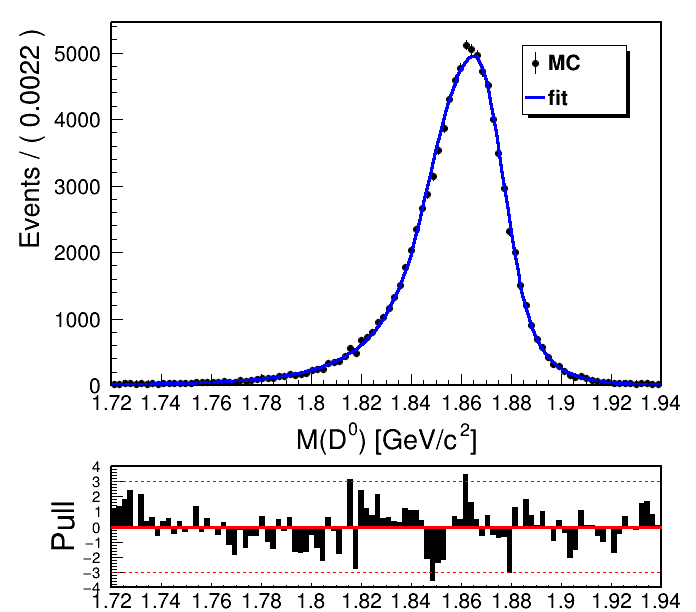

In [76]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)



xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
# sig1 = ROOT.RooJohnson("sig1", "Signal component 1", x,mu, para_lambda,gamma,delta)

sig2 = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)


sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)



# model = ROOT.RooCBShape("model", "Signal component 2", x, mean, sigma2, alpha, n_CB)

# model = ROOT.RooAddPdf("model", "model", [sig1, sig2], sig1frac)
model = ROOT.RooCrystalBall("model", "Signal component 2", x, mean, sigmaL, sigmaR, alphaL, nL, alphaR, nR)


r = model.fitTo(data1,NumCPU=12,Range=fitting_region,PrintLevel=-1, Save=1)

r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data1.plotOn(frame,Name = "data1", XErrorSize=0)

model.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
model.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="fitting",)


# sig.paramOn(frame)

frame.GetXaxis().CenterTitle(True)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
# leg1.SetBorderSize(0)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")


pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)

canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/antiKstargamma/antiKstar_massveto_signal.png")
# canv.SaveAs("test.png")
f = ROOT.TFile("antiKstarg_signalMC_fitresult.root", "RECREATE")
r.Write("antiKstarg")
f.Close()


In [77]:
model.Print("t")

0x56071b405850 RooCrystalBall::model = 0.215662 [Auto,Dirty] 
  0x560737a8ed80/V- RooRealVar::D0_M = 1.83
  0x56071860e980/V- RooRealVar::mean = 1.86521 +/- 0.000275097
  0x560701ed1030/V- RooRealVar::sigmaL = 0.0185967 +/- 0.000330339
  0x560719b8e990/V- RooRealVar::sigmaR = 0.0120511 +/- 0.000251451
  0x560706fab430/V- RooRealVar::alphaL = 1.25087 +/- 0.0329161
  0x560707e50ee0/V- RooRealVar::nL = 5.6627 +/- 0.348104
  0x5607056a5280/V- RooRealVar::alphaR = 1.50552 +/- 0.0580766
  0x560705ce75b0/V- RooRealVar::nR = 7.55618 +/- 1.0886


In [81]:
f = ROOT.TFile.Open("antiKstarg_signalMC_fitresult.root")
r2 = ROOT.gDirectory.Get("antiKstarg")
f.Close()


In [82]:
r2.Print()


  RooFitResult: minimized FCN value: -235941, estimated distance to minimum: 0.000273737
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                alphaL    1.2509e+00 +/-  3.29e-02
                alphaR    1.5055e+00 +/-  5.81e-02
                  mean    1.8652e+00 +/-  2.75e-04
                    nL    5.6627e+00 +/-  3.48e-01
                    nR    7.5562e+00 +/-  1.09e+00
                sigmaL    1.8597e-02 +/-  3.30e-04
                sigmaR    1.2051e-02 +/-  2.51e-04



In [100]:
r2.correlation("alpha","n_CB")

-0.9112665373350943

In [101]:
r2.edm()

0.00047053225926932336

In [102]:
r2.correlationMatrix()

<cppyy.gbl.TMatrixTSym<double> object at 0x55f4393aad10>

# cosHel

In [54]:
# ROOT.RooClassFactory.makePdf("MyPdf_one_minus_squared", "x,c0", "", "c0*(1-x*x)")
ROOT.gROOT.ProcessLineSync(".x MyPdf_one_minus_squared.cxx+")

94588998711888

(MyPdf_one_minus_squared) An instance of MyPdf_one_minus_squared.


In [20]:
# ROOT.RooClassFactory.makePdf("MyPdf_xsquared_nopara", "x", "", "x*x")
# ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared_nopara.cxx+")

In [78]:
fitting_region = (-1, 1)
# y = ROOT.RooRealVar("cos#theta_{H}", "cos#theta_{H}", fitting_region[0], fitting_region[1], "")
# y.setBins(50)
# y_l = ROOT.RooArgList(y)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, scale_factor)
# y_signalhist = ROOT.RooDataHist("y_signalhist", "sighist", y_l, D0_cosHel_TH1F, 1)


In [79]:
y_mean = ROOT.RooRealVar("y_mean", "mean of gaussians", 0.5,0.4, 0.6)
y_sigma1 = ROOT.RooRealVar("y_sigma1", "width of gaussians", 0.03,0,0.2)
y_sigma2 = ROOT.RooRealVar("y_sigma2", "width of gaussians", 0.02,0,0.2)

c0 = ROOT.RooRealVar("c0", "c0",0.2, 0,1)


Cheby_c0 = ROOT.RooRealVar("Cheby_c0", "c0",0.2, -1,1)
Cheby_c1 = ROOT.RooRealVar("Cheby_c1", "c0",0.2, -1,1)
Cheby_c2 = ROOT.RooRealVar("Cheby_c2", "c0",0.2, -1,1)


0

[#1] INFO:Eval -- RooRealVar::setRange(D0_cosHel_0) new range named 'fit' created with bounds [-1,1]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_data) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(D0_cosHel_0) new range named 'NormalizationRangeForfit' created with bounds [-1,1]
[#1] INFO:Eval -- RooRealVar::setRange(D0_cosHel_0) new range named 'fit_nll_model_data' created with bounds [-1,1]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_data) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[D0_cosHel_0]) using numeric integrator RooIntegrator1D to calculate Int(D0_cosHel_0)
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file /media/jykim/T7/saved_plots/fitting/results/antiKstargamma/antiKstar_massveto_signal_coshel.png has been created
Error in <TROOT::WriteTObject>: The current directory (PyROOT) is not associated with a file. The object (antiKstarg) has not been written.


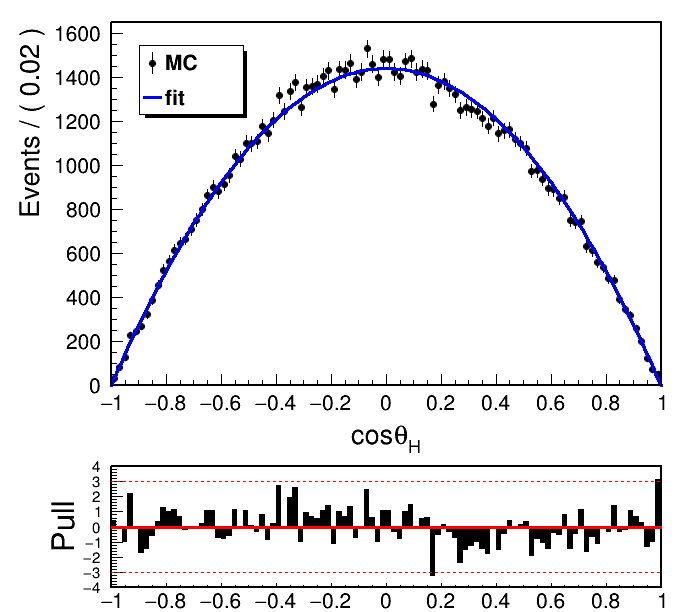

In [80]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))


# y_bkg1_model = ROOT.MyPdf_xsquared_nopara("y_bkg1_model", "y_bkg1", y)
# model = ROOT.MyPdf_xsquared_nopara("model", "y_bkg1", y)
# sig1 = ROOT.MyPdf_xsquared_nopara("sig1", "y_bkg1", y)
model = ROOT.MyPdf_one_minus_squared("model", "y_bkg1", y, c0)


# sig2_1 = ROOT.RooGaussian("sig2_1", "Signal component 1", y, y_mean, y_sigma1)
# sig2_2 = ROOT.RooGaussian("sig2_2", "Signal component 1", y, y_mean, y_sigma2)

# frac2 = ROOT.RooRealVar("frac2", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
# sig2 = ROOT.RooAddPdf("sig2", "model", [sig2_1, sig2_2], frac2)


# sig3 = ROOT.RooChebychev("sig3", "Signal component 1", y, ROOT.RooArgList(Cheby_c0, Cheby_c1, Cheby_c2))

# sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
# sig2frac = ROOT.RooRealVar("sig2frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)


# # model = ROOT.RooCBShape("model", "Signal component 2", x, mean, sigma2, alpha, n_CB)

# sig_model1 = ROOT.RooAddPdf("sig_model1", "model", [sig1, sig2], sig1frac)
# model = ROOT.RooAddPdf("model", "model", [sig3, sig_model1], sig2frac)




run = model.fitTo(data1,NumCPU=12,Range=(-1,1),PrintLevel=-1, Save=1)
# run = model.fitTo(y_signalhist,NumCPU=12,Range=(-1,1),PrintLevel=-1)

run.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = y.frame(Title=" ")

data1.plotOn(frame,Name = "data1", XErrorSize=0)

# model.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# model.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# model.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="fitting",)


# sig.paramOn(frame)
frame.GetXaxis().CenterTitle(True)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.20, 0.75, 0.35, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = y.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.22)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.15)
pullplot.GetYaxis().SetLabelSize(0.105)

canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/antiKstargamma/antiKstar_massveto_signal_coshel.png")
# canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/antiKstargamma/antiKstar_massveto_1ab_signal_coshel_try2.png")

# f = ROOT.TFile("antiKstarg_signalMC_fitresult.root", "RECREATE")
r.Write("antiKstarg")
# f.Close()


In [108]:
model.Print("t")

0x55f4391723d0 MyPdf_one_minus_squared::model = 0.199998 [Auto,Dirty] 
  0x55f439ce2b20/V- RooRealVar::cos#theta_{H} = 0
  0x55f4395f50e0/V- RooRealVar::c0 = 0.199998 +/- 0.816292
